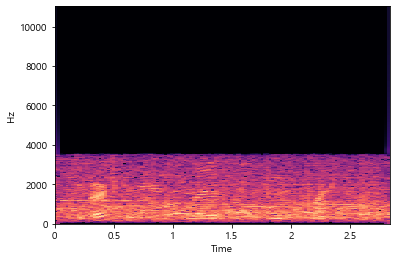

In [97]:
import numpy as np
import librosa as lbr
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal as sp
plt.rc('font', family='Malgun Gothic')

y, sr = librosa.load("C:/Users/Flora/Documents/이세은/2-2교과목/디지털신호처리/붙임3. NOISY_INPUT_DB/airport/0dB/sp01_airport_sn0.wav")
ft = librosa.stft(y)

db = librosa.amplitude_to_db(np.abs(ft), ref=np.max)
librosa.display.specshow(db, x_axis='time', y_axis='linear')
plt.show()

In [98]:
from scipy.io import wavfile
fs, x = wavfile.read("C:/Users/Flora/Documents/이세은/2-2교과목/디지털신호처리/붙임3. NOISY_INPUT_DB/airport/0dB/sp01_airport_sn0.wav")

print('입력신호')
display(ipd.Audio(x, rate = fs))

입력신호


In [99]:
data = np.zeros(len(x))
for i in range(0,len(x),50):
    x_ = x[i:i+100]
    x_w = x_ * np.hamming(len(x_))
    x_fft = np.fft.fft(x_w)
    x_fft[abs(x_fft) < 4000] /= x_fft[abs(x_fft) < 4000]**2 # 윈도윙 후 잡음 제거 방법 개선 필요
    x_ifft = np.fft.ifft(x_fft)
    data[i:i+100] += x_ifft.real
data

array([ -53.95727751,   43.429791  ,  -64.03842161, ...,  -28.55706158,
       -195.1912317 ,  -96.75356959])

In [100]:
print('출력신호')
display(ipd.Audio(data, rate = fs))

출력신호


In [101]:
# Load audio
x , sr =lbr.load("C:/Users/Flora/Downloads/다운로드.wav")
x/=np.abs(x).max()
display(ipd.Audio(x, rate = sr ))

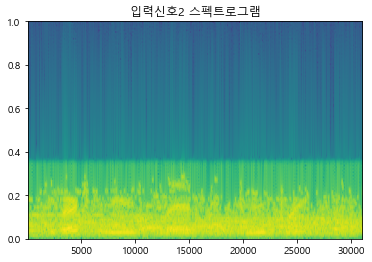

In [102]:
plt.specgram(x)
plt.title('입력신호1 스펙트로그램')
plt.show()

In [103]:
'''np.random.seed(27)
maiden_noise = x + 0.3*(np.random.random(np.shape(x))-0.5)
display(ipd.Audio(maiden_noise, rate = sr ))'''

'np.random.seed(27)\nmaiden_noise = x + 0.3*(np.random.random(np.shape(x))-0.5)\ndisplay(ipd.Audio(maiden_noise, rate = sr ))'

In [112]:
maiden_filtered = sp.wiener(x, mysize=3)
display(ipd.Audio(maiden_filtered, rate = sr ))

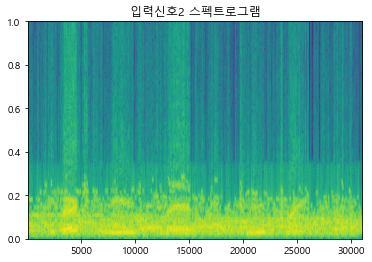

In [113]:
plt.specgram(maiden_filtered)
plt.title('입력신호2 스펙트로그램')
plt.show()

In [116]:
print('MSE: Noise',sum(np.power(maiden_noise[:200000]-x[:200000],2))/200000)
print('MSE: FIltered',sum(np.power(maiden_filtered[:200000]-x[:200000],2))/200000)

MSE: Noise 0.002448306768484728
MSE: FIltered 2.5076697993966024e-06
